In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np
from random import randrange
from scipy.stats import linregress
from scipy import stats as st
# Study data files
path = "Resources/backloggd_games.csv"

# Read the mouse data and the study results
game_df = pd.read_csv(path)

# Display the data table for preview
game_df.head()

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,0,Elden Ring,"Feb 25, 2022","['FromSoftware', 'Bandai Namco Entertainment']","Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,2,Hades,"Dec 07, 2018",['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,3,Hollow Knight,"Feb 24, 2017",['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,4,Undertale,"Sep 15, 2015","['tobyfox', '8-4']","A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K


In [2]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    60000 non-null  int64  
 1   Title         60000 non-null  object 
 2   Release_Date  60000 non-null  object 
 3   Developers    60000 non-null  object 
 4   Summary       55046 non-null  object 
 5   Platforms     60000 non-null  object 
 6   Genres        60000 non-null  object 
 7   Rating        25405 non-null  float64
 8   Plays         60000 non-null  object 
 9   Playing       60000 non-null  object 
 10  Backlogs      60000 non-null  object 
 11  Wishlist      60000 non-null  object 
 12  Lists         60000 non-null  object 
 13  Reviews       60000 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 6.4+ MB


In [3]:
game_df.Developers.nunique()

18356

In [4]:
game_df.Developers.value_counts()

Developers
[]                                        18091
['Konami']                                  470
['Nintendo']                                325
['Capcom']                                  318
['Sega']                                    185
                                          ...  
['NanoPiko Games', 'Plug In Digital']         1
['DevCubeStudio', 'Fibrum Limited']           1
['TeamFatBears']                              1
['Blueside', 'Microsoft Game Studios']        1
['Travian Games', 'Shadow Masters']           1
Name: count, Length: 18356, dtype: int64

In [5]:
game_df.Title.value_counts()

Title
Date A Live Twin Edition: Rio Reincarnation            24
Tube                                                   21
Yakiniku Bugyou                                        20
The Store is Closed                                    20
Nonogram Survival                                      19
                                                       ..
Spider-Man: Homecoming - Virtual Reality Experience     1
Hammerfight                                             1
Team USA Basketball                                     1
Syvalion                                                1
Orbit - Playing with Gravity                            1
Name: count, Length: 40985, dtype: int64

In [6]:
game_df.Title.nunique()

40985

In [7]:
game_df['Developers']=game_df['Developers'].str.split(',').str[0]
game_df.head()

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,0,Elden Ring,"Feb 25, 2022",['FromSoftware',"Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017",['Nintendo',The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,2,Hades,"Dec 07, 2018",['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,3,Hollow Knight,"Feb 24, 2017",['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,4,Undertale,"Sep 15, 2015",['tobyfox',"A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K


In [8]:
game_df["Developers"] = game_df["Developers"].astype(str)
game_df.head()

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,0,Elden Ring,"Feb 25, 2022",['FromSoftware',"Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017",['Nintendo',The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,2,Hades,"Dec 07, 2018",['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,3,Hollow Knight,"Feb 24, 2017",['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,4,Undertale,"Sep 15, 2015",['tobyfox',"A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K


In [9]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    60000 non-null  int64  
 1   Title         60000 non-null  object 
 2   Release_Date  60000 non-null  object 
 3   Developers    60000 non-null  object 
 4   Summary       55046 non-null  object 
 5   Platforms     60000 non-null  object 
 6   Genres        60000 non-null  object 
 7   Rating        25405 non-null  float64
 8   Plays         60000 non-null  object 
 9   Playing       60000 non-null  object 
 10  Backlogs      60000 non-null  object 
 11  Wishlist      60000 non-null  object 
 12  Lists         60000 non-null  object 
 13  Reviews       60000 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 6.4+ MB


In [10]:
game_df["Developers"] = game_df["Developers"].apply(lambda x: str(x).lstrip("['")) #TA Mike came up with this code
game_df["Developers"] = game_df["Developers"].apply(lambda x: str(x).rstrip("']"))
game_df.head()

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,0,Elden Ring,"Feb 25, 2022",FromSoftware,"Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017",Nintendo,The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,2,Hades,"Dec 07, 2018",Supergiant Games,A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,3,Hollow Knight,"Feb 24, 2017",Team Cherry,A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,4,Undertale,"Sep 15, 2015",tobyfox,"A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K


In [11]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    60000 non-null  int64  
 1   Title         60000 non-null  object 
 2   Release_Date  60000 non-null  object 
 3   Developers    60000 non-null  object 
 4   Summary       55046 non-null  object 
 5   Platforms     60000 non-null  object 
 6   Genres        60000 non-null  object 
 7   Rating        25405 non-null  float64
 8   Plays         60000 non-null  object 
 9   Playing       60000 non-null  object 
 10  Backlogs      60000 non-null  object 
 11  Wishlist      60000 non-null  object 
 12  Lists         60000 non-null  object 
 13  Reviews       60000 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 6.4+ MB


In [12]:
# Use a for loop to change to columns (Plays, Playing, Backlogs, Wishlist, Lists, and Reviews)
# Use an replace statement to any change any value with 'K' to a float, multiply that by 1,000, and then change the entire column to integers

cols = ('Plays', 'Playing', 'Backlogs', 'Wishlist', 'Lists', 'Reviews')

for col in cols:
    # Apply a lambda function to replace ‘K’ and multiply by 1000 if ‘K’ is present
    game_df[col] = game_df[col].apply(lambda x: float(str(x).replace('K', '')) * 1000 if 'K' in str(x) else int(x))

game_df.head()

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,0,Elden Ring,"Feb 25, 2022",FromSoftware,"Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21000.0,4100.0,5600.0,5500.0,4600.0,3000.0
1,1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017",Nintendo,The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35000.0,3100.0,5600.0,3000.0,5100.0,3000.0
2,2,Hades,"Dec 07, 2018",Supergiant Games,A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25000.0,3500.0,7300.0,4000.0,3200.0,2100.0
3,3,Hollow Knight,"Feb 24, 2017",Team Cherry,A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25000.0,2700.0,9600.0,2600.0,3400.0,2100.0
4,4,Undertale,"Sep 15, 2015",tobyfox,"A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32000.0,728.0,5700.0,2100.0,3900.0,2500.0


In [13]:
# Change Release_Date to datetime, had to adjust for TBD values so changed them to NaT (Not a Time) function

game_df['Release_Date'] = game_df['Release_Date'].str.replace('TBD', 'NaT')
game_df['Release_Date'] = pd.to_datetime(game_df['Release_Date'])

In [14]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    60000 non-null  int64         
 1   Title         60000 non-null  object        
 2   Release_Date  51981 non-null  datetime64[ns]
 3   Developers    60000 non-null  object        
 4   Summary       55046 non-null  object        
 5   Platforms     60000 non-null  object        
 6   Genres        60000 non-null  object        
 7   Rating        25405 non-null  float64       
 8   Plays         60000 non-null  float64       
 9   Playing       60000 non-null  float64       
 10  Backlogs      60000 non-null  float64       
 11  Wishlist      60000 non-null  float64       
 12  Lists         60000 non-null  float64       
 13  Reviews       60000 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(5)
memory usage: 6.4+ MB


In [15]:
game_df['Platforms'] = game_df['Platforms'].str.split(',')
game_df['Genres'] = game_df['Genres'].str.split(',')

In [16]:
# After converting those columns into a list, I could now continue with creating a code that can count the Platforms and Genres, then put them in new columns.
# I thought that maybe len(x) could work, it failed, then tried .apply len(x), which also failed.
# There was no specific function to accomplish what I needed, which reminded me of lambda, which I had previously looked up because the TA had given the group a lambda function before.
# After repeated trial and error I finally came up with the code below.
# ".apply" applies all the things in the () to the Platforms column. 
# "lambda x:" is used because "lambda", x, and colon, must be used in that order to start the lambda function.
# "len(x)" is used to count the x or elements within the cell.
platform_counts = game_df['Platforms'].apply(lambda x: len(x))
genre_counts = game_df['Genres'].apply(lambda x: len(x))

# Adding new columns for platform and genre counts through the use of brackets..
game_df['Platform_Count'] = platform_counts
game_df['Genre_Count'] = genre_counts

game_df.head()

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,Platform_Count,Genre_Count
0,0,Elden Ring,2022-02-25,FromSoftware,"Elden Ring is a fantasy, action and open world...","[['Windows PC', 'PlayStation 4', 'Xbox One',...","[['Adventure', 'RPG']]",4.5,21000.0,4100.0,5600.0,5500.0,4600.0,3000.0,5,2
1,1,The Legend of Zelda: Breath of the Wild,2017-03-03,Nintendo,The Legend of Zelda: Breath of the Wild is the...,"[['Wii U', 'Nintendo Switch']]","[['Adventure', 'Puzzle']]",4.4,35000.0,3100.0,5600.0,3000.0,5100.0,3000.0,2,2
2,2,Hades,2018-12-07,Supergiant Games,A rogue-lite hack and slash dungeon crawler in...,"[['Windows PC', 'Mac', 'PlayStation 4', 'Xb...","[['Adventure', 'Brawler', 'Indie', 'RPG']]",4.3,25000.0,3500.0,7300.0,4000.0,3200.0,2100.0,7,4
3,3,Hollow Knight,2017-02-24,Team Cherry,A 2D metroidvania with an emphasis on close co...,"[['Windows PC', 'Mac', 'Linux', 'Nintendo S...","[['Adventure', 'Indie', 'Platform']]",4.4,25000.0,2700.0,9600.0,2600.0,3400.0,2100.0,4,3
4,4,Undertale,2015-09-15,tobyfox,"A small child falls into the Underground, wher...","[['Windows PC', 'Mac', 'Linux', 'PlayStatio...","[['Adventure', 'Indie', 'RPG', 'Turn Based ...",4.2,32000.0,728.0,5700.0,2100.0,3900.0,2500.0,7,4


In [17]:
# Now that the list was done, I need to convert back to a string so I could use str.replace (as was originally planned but would change) to get rid of the extra characters.
# I copied the code used for turning the developers column into a string and then altered it for Platforms and Genres.
game_df['Platforms'] = game_df['Platforms'].astype(str)
game_df['Genres'] = game_df['Genres'].astype(str)
game_df.head()

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,Platform_Count,Genre_Count
0,0,Elden Ring,2022-02-25,FromSoftware,"Elden Ring is a fantasy, action and open world...","[""['Windows PC'"", "" 'PlayStation 4'"", "" 'Xbox ...","[""['Adventure'"", "" 'RPG']""]",4.5,21000.0,4100.0,5600.0,5500.0,4600.0,3000.0,5,2
1,1,The Legend of Zelda: Breath of the Wild,2017-03-03,Nintendo,The Legend of Zelda: Breath of the Wild is the...,"[""['Wii U'"", "" 'Nintendo Switch']""]","[""['Adventure'"", "" 'Puzzle']""]",4.4,35000.0,3100.0,5600.0,3000.0,5100.0,3000.0,2,2
2,2,Hades,2018-12-07,Supergiant Games,A rogue-lite hack and slash dungeon crawler in...,"[""['Windows PC'"", "" 'Mac'"", "" 'PlayStation 4'""...","[""['Adventure'"", "" 'Brawler'"", "" 'Indie'"", "" '...",4.3,25000.0,3500.0,7300.0,4000.0,3200.0,2100.0,7,4
3,3,Hollow Knight,2017-02-24,Team Cherry,A 2D metroidvania with an emphasis on close co...,"[""['Windows PC'"", "" 'Mac'"", "" 'Linux'"", "" 'Nin...","[""['Adventure'"", "" 'Indie'"", "" 'Platform']""]",4.4,25000.0,2700.0,9600.0,2600.0,3400.0,2100.0,4,3
4,4,Undertale,2015-09-15,tobyfox,"A small child falls into the Underground, wher...","[""['Windows PC'"", "" 'Mac'"", "" 'Linux'"", "" 'Pla...","[""['Adventure'"", "" 'Indie'"", "" 'RPG'"", "" 'Turn...",4.2,32000.0,728.0,5700.0,2100.0,3900.0,2500.0,7,4


In [18]:
# Originally was 8 lines of code to remove the unwanted characters but after playing around a bit, I got it lowered to two.
game_df['Platforms'] = game_df['Platforms'].str.replace("[","").str.replace("]","").str.replace("'","").str.replace('"','')
game_df['Genres'] = game_df['Genres'].str.replace("[","").str.replace("]","").str.replace("'","").str.replace('"','')
game_df.head()

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,Platform_Count,Genre_Count
0,0,Elden Ring,2022-02-25,FromSoftware,"Elden Ring is a fantasy, action and open world...","Windows PC, PlayStation 4, Xbox One, PlaySt...","Adventure, RPG",4.5,21000.0,4100.0,5600.0,5500.0,4600.0,3000.0,5,2
1,1,The Legend of Zelda: Breath of the Wild,2017-03-03,Nintendo,The Legend of Zelda: Breath of the Wild is the...,"Wii U, Nintendo Switch","Adventure, Puzzle",4.4,35000.0,3100.0,5600.0,3000.0,5100.0,3000.0,2,2
2,2,Hades,2018-12-07,Supergiant Games,A rogue-lite hack and slash dungeon crawler in...,"Windows PC, Mac, PlayStation 4, Xbox One, ...","Adventure, Brawler, Indie, RPG",4.3,25000.0,3500.0,7300.0,4000.0,3200.0,2100.0,7,4
3,3,Hollow Knight,2017-02-24,Team Cherry,A 2D metroidvania with an emphasis on close co...,"Windows PC, Mac, Linux, Nintendo Switch","Adventure, Indie, Platform",4.4,25000.0,2700.0,9600.0,2600.0,3400.0,2100.0,4,3
4,4,Undertale,2015-09-15,tobyfox,"A small child falls into the Underground, wher...","Windows PC, Mac, Linux, PlayStation 4, Xbo...","Adventure, Indie, RPG, Turn Based Strategy",4.2,32000.0,728.0,5700.0,2100.0,3900.0,2500.0,7,4


In [19]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      60000 non-null  int64         
 1   Title           60000 non-null  object        
 2   Release_Date    51981 non-null  datetime64[ns]
 3   Developers      60000 non-null  object        
 4   Summary         55046 non-null  object        
 5   Platforms       60000 non-null  object        
 6   Genres          60000 non-null  object        
 7   Rating          25405 non-null  float64       
 8   Plays           60000 non-null  float64       
 9   Playing         60000 non-null  float64       
 10  Backlogs        60000 non-null  float64       
 11  Wishlist        60000 non-null  float64       
 12  Lists           60000 non-null  float64       
 13  Reviews         60000 non-null  float64       
 14  Platform_Count  60000 non-null  int64         
 15  Ge

In [20]:
game_df_200 = game_df[game_df['Reviews'] >=200]

game_df_200['Developers'] = game_df_200['Developers'].replace({"Nintendo EAD": "Nintendo"}).replace({"Ubisoft Montreal":"Ubisoft Entertainment"}).replace({"Sony Computer Entertainment": "Sony Interactive Entertainment"}).replace({"Nintendo EAD Group No. 1": "Nintendo"})

C:\Users\dehey\AppData\Local\Temp\ipykernel_21200\2348029934.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_df_200['Developers'] = game_df_200['Developers'].replace({"Nintendo EAD": "Nintendo"}).replace({"Ubisoft Montreal":"Ubisoft Entertainment"}).replace({"Sony Computer Entertainment": "Sony Interactive Entertainment"}).replace({"Nintendo EAD Group No. 1": "Nintendo"})


In [21]:
game_dev_Nintendo = game_df_200[game_df_200['Developers']=='Nintendo']

game_dev_Nintendo = game_dev_Nintendo[game_dev_Nintendo['Title'] != 'The Legend of Zelda: Tears of the Kingdom']

game_dev_Nintendo_plays = game_dev_Nintendo['Plays']
game_dev_Nintendo_playing = game_dev_Nintendo['Playing']
game_dev_Nintendo_rating = game_dev_Nintendo['Rating']

game_dev_Nintendo_sorted = game_dev_Nintendo.sort_values(by='Rating', ascending=False).head(99)


display(game_dev_Nintendo_sorted)

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,Platform_Count,Genre_Count
1,1,The Legend of Zelda: Breath of the Wild,2017-03-03,Nintendo,The Legend of Zelda: Breath of the Wild is the...,"Wii U, Nintendo Switch","Adventure, Puzzle",4.4,35000.0,3100.0,5600.0,3000.0,5100.0,3000.0,2,2
84,84,The Legend of Zelda: Majora's Mask,2000-04-27,Nintendo,The Legend of Zelda: Majora's Mask is a direct...,"Wii U, Wii, Nintendo 64",Adventure,4.4,14000.0,385.0,4600.0,2100.0,2600.0,743.0,3,1
31,31,Xenoblade Chronicles 3,2022-07-29,Nintendo,"A vast world awaits in Xenoblade Chronicles 3,...",Nintendo Switch,"Adventure, RPG",4.4,4700.0,821.0,2700.0,2500.0,1700.0,815.0,1,2
78,78,Metroid Prime Remastered,2023-02-08,Nintendo,Get behind the visor of intergalactic bounty h...,Nintendo Switch,"Adventure, Platform, Shooter",4.4,2100.0,632.0,2000.0,1900.0,654.0,457.0,1,3
669,669,Shovel Knight: Treasure Trove,2019-12-09,Nintendo,Shovel Knight: Treasure Trove is the full and ...,"Windows PC, Mac, Wii U, Linux, PlayStation...","Adventure, Indie, Platform",4.3,4200.0,202.0,1500.0,656.0,518.0,231.0,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,474,Super Smash Bros.,1999-01-21,Nintendo,Super Smash Bros. is a crossover fighting vide...,"Wii, Nintendo 64","Fighting, Platform",3.4,11000.0,22.0,324.0,241.0,764.0,349.0,2,2
583,583,The Legend of Zelda: Phantom Hourglass,2007-06-23,Nintendo,The Legend of Zelda: Phantom Hourglass is the ...,"Wii U, Nintendo DS","Adventure, Puzzle, RPG",3.3,7500.0,109.0,1900.0,684.0,851.0,219.0,2,3
265,265,The Legend of Zelda,1986-02-21,Nintendo,The Legend of Zelda is the first title in the ...,"Wii U, Wii, Family Computer Disk System, Ni...",Adventure,3.3,11000.0,164.0,1700.0,523.0,1400.0,500.0,6,1
595,595,Pokémon Y,2013-10-12,Nintendo,Your adventure in Pokémon X and Pokémon Y take...,Nintendo 3DS,"Adventure, RPG, Turn Based Strategy",3.2,9400.0,100.0,604.0,247.0,705.0,386.0,1,3


In [22]:
# Filtering developers with one game under them with the >=200 dataframe.
game_devs_one_off = game_df_200.groupby('Developers').filter(lambda x: len(x) == 1)

# Sorting the devs based on Ratings, which then displays the top 50.
top_100_devs_one_off = game_devs_one_off.sort_values(by='Rating', ascending=False).head(99)

# Puts everything together into a single dataframe along with adding 'Plays' for the regression later. Put in drop_duplicates just in case.
top_100_devs_df = top_100_devs_one_off.drop_duplicates()

# To prepare further for the regression, 'Plays' and 'Rating' need to be assigned as well.
top_100_devs_plays = top_100_devs_df['Plays']
top_100_devs_rating = top_100_devs_df['Rating']

# Displaying the top 50.
display(top_100_devs_df)

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,Platform_Count,Genre_Count
10,10,Persona 5 Royal,2019-10-31,Atlus USA,An enhanced version of Persona 5 with some new...,"Windows PC, PlayStation 4, Xbox One, PlaySt...","Adventure, RPG, Turn Based Strategy",4.4,15000.0,2600.0,6100.0,3500.0,3100.0,1700.0,6,3
311,311,Deus Ex,2000-06-26,Aspyr Media,A philosophical first-person WRPG set in a dys...,"Windows PC, Mac","RPG, Shooter",4.4,4300.0,207.0,3100.0,1100.0,1100.0,258.0,2,2
406,406,Umineko: When They Cry,2007-08-17,07th Expansion,Umineko: When They Cry is a Japanese murder my...,"Windows PC, iOS, PlayStation 3, Mobile, Pl...","Adventure, Visual Novel",4.4,2400.0,334.0,1400.0,1100.0,495.0,216.0,5,2
55,55,Pizza Tower,2023-01-26,Tour De Pizza,Pizza Tower is a 2D platformer mainly inspired...,Windows PC,"Indie, Platform",4.4,2200.0,428.0,1400.0,2000.0,624.0,630.0,1,2
942,942,The Binding of Isaac: Repentance,2021-03-31,Edmund McMillen,The Binding of Isaac: Repentance is the ultima...,"Windows PC, PlayStation 4, Xbox One, PlaySt...","Adventure, Arcade, Indie, RPG, Shooter",4.4,3100.0,440.0,397.0,386.0,299.0,273.0,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,649,Bloons TD 6,2018-06-14,Ninja Kiwi,The Bloons are back and better than ever! Craf...,"Windows PC, Android, Mac, iOS","Strategy, Tactical",3.8,5100.0,404.0,439.0,87.0,307.0,468.0,4,2
928,928,Everhood,2021-03-03,Surefire.Games,Expect the unexpected in an ineffable tale of ...,"Windows PC, Nintendo Switch","Adventure, Indie, Music, RPG",3.8,1600.0,90.0,869.0,497.0,358.0,202.0,2,4
580,580,Fallout,1997-09-30,Edusoft,The Vault Dweller is tasked with exploring pos...,"Windows PC, Mac, PC DOS","RPG, Turn Based Strategy",3.8,4100.0,141.0,2700.0,583.0,750.0,203.0,3,2
298,298,Subnautica,2014-12-01,Gearbox Publishing,Descend into the depths of an alien underwater...,"Windows PC, Mac, PlayStation 4, SteamVR, X...","Adventure, Indie",3.8,8600.0,392.0,3400.0,1100.0,831.0,487.0,9,2


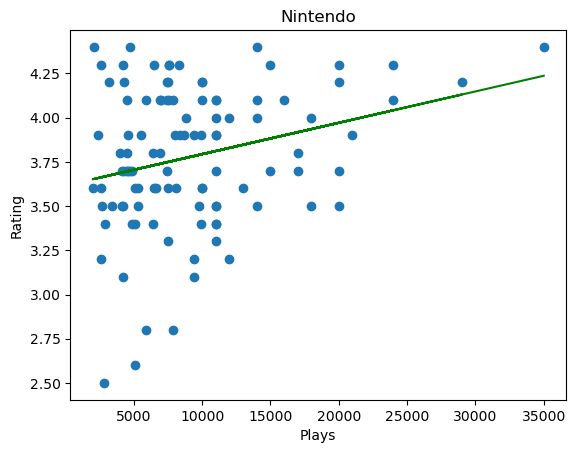

In [23]:
correlation = st.pearsonr(game_dev_Nintendo_plays, game_dev_Nintendo_rating)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(game_dev_Nintendo_plays, game_dev_Nintendo_rating)

regress_values = game_dev_Nintendo_plays * slope + intercept

plt.scatter(game_dev_Nintendo_plays, game_dev_Nintendo_rating)
plt.plot(game_dev_Nintendo_plays, regress_values, color= "green")
plt.title("Nintendo")
plt.xlabel("Plays")
plt.ylabel("Rating")
plt.grid(False)
plt.show()

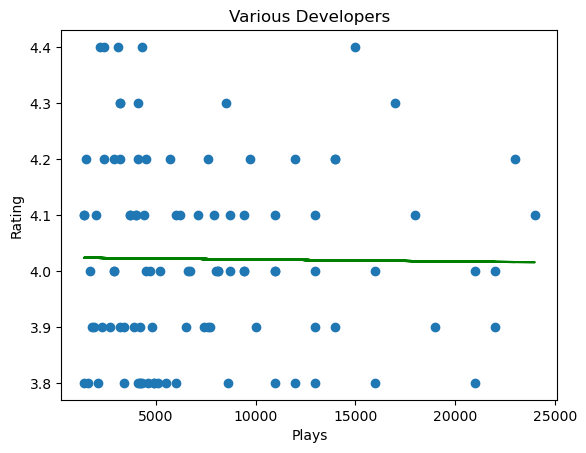

In [24]:

correlation = st.pearsonr(top_100_devs_plays, top_100_devs_rating)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(top_100_devs_plays, top_100_devs_rating)

regress_values = top_100_devs_plays * slope + intercept

plt.scatter(top_100_devs_plays, top_100_devs_rating)
plt.plot(top_100_devs_plays, regress_values, color= "green")
plt.title("Various Developers")
plt.xlabel("Plays")
plt.ylabel("Rating")
plt.grid(False)
plt.show()